# Problem Statement

- Develop a model to predict customer churn for a subscription based service or business.

# Libraries

In [1]:
#warnings
import warnings
warnings.filterwarnings('ignore')

#data gathering
import os
os.chdir('C:/Users/ASUS/Downloads/')
import pandas as pd
import numpy as np

#EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

#preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

#split
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_curve, auc

#cross validation
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Data Gathering

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

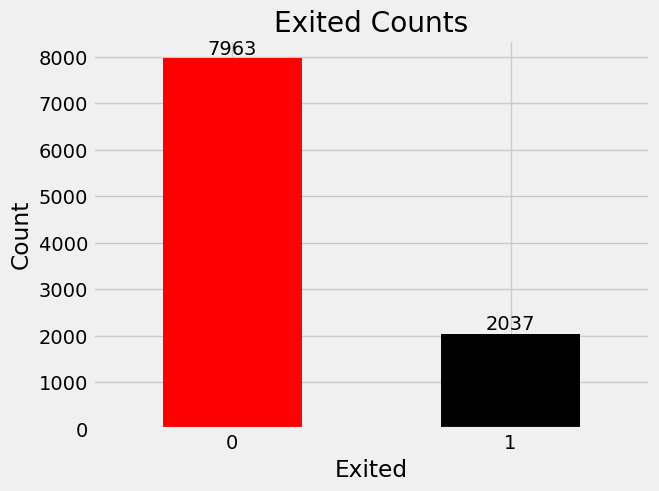

In [7]:
df['Exited'].value_counts().plot(kind='bar', color=['red', 'black'])
plt.title("Exited Counts")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Show data labels on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom')
plt.show()

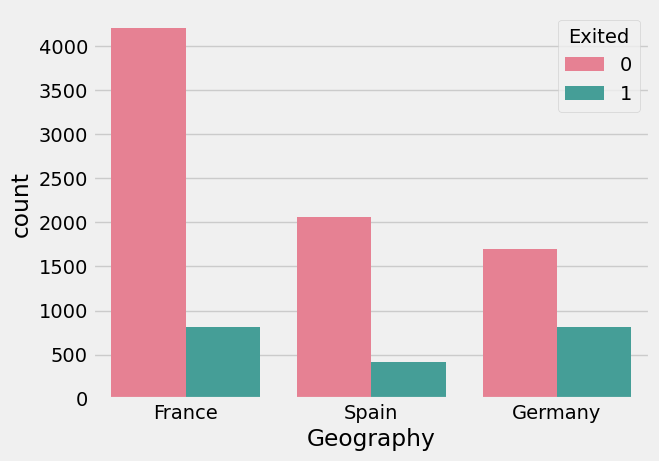

In [8]:
sns.countplot(x=df['Geography'], hue=df['Exited'], palette='husl')
plt.show()

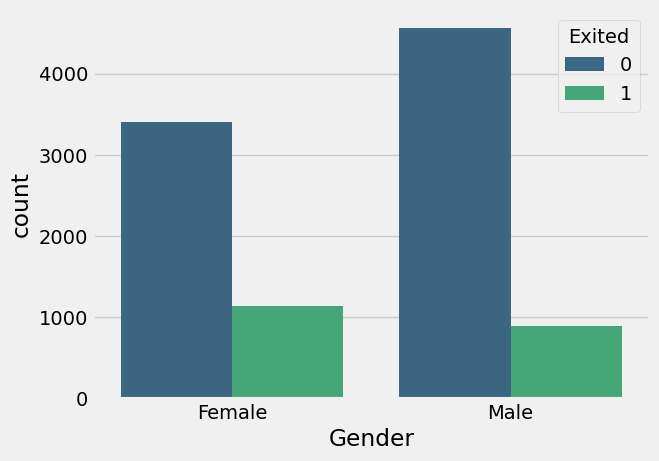

In [9]:
sns.countplot(x=df['Gender'], hue=df['Exited'], palette='viridis')
plt.show()

Text(0.5, 1.0, 'Distribution of Customer_Age by Exited')

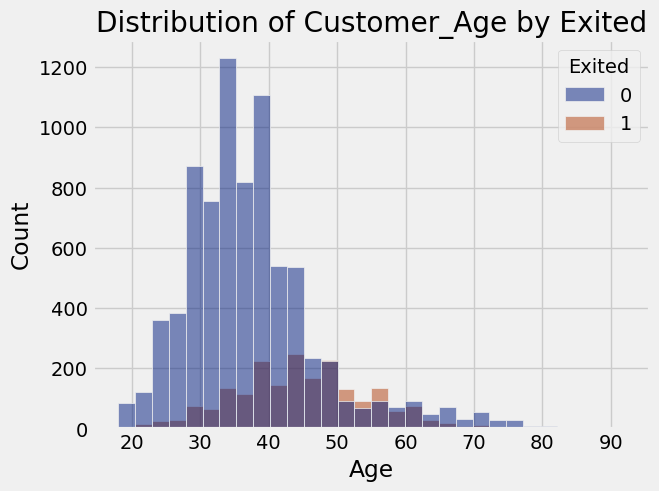

In [10]:
sns.histplot(data=df, x='Age', bins=30, hue='Exited', palette='dark')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer_Age by Exited')

# Feature Selection

In [11]:
df.drop(["RowNumber", "CustomerId", "Surname"],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Preprocessing

In [12]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

In [13]:
cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [14]:
cat, con

(['Geography', 'Gender'],
 ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'])

In [15]:
#pipelines 
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OrdinalEncoder())])

In [16]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'EstimatedSalary']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OrdinalEncoder())]),
                                 ['Geography', 'Gender'])])

In [17]:
x1=pd.DataFrame(pre.fit_transform(x),columns=pre.get_feature_names_out())
x1

,num_pipe__CreditScore,num_pipe__Age,num_pipe__Tenure,num_pipe__Balance,num_pipe__NumOfProducts,num_pipe__HasCrCard,num_pipe__IsActiveMember,num_pipe__EstimatedSalary,cat_pipe__Geography,cat_pipe__Gender
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.0,0.0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,2.0,0.0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.0,0.0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.0,0.0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0.0,1.0
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0.0,1.0
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,0.0,0.0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.0,1.0


# Splitting Data into train and test set

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,stratify=y,random_state=23)

# Model Implementation

In [19]:
la=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
kn=KNeighborsClassifier()
svc=SVC()

In [20]:
model_list=[la,dtc,rfc,abc,kn,svc]         # model_list contains the following machine learning models: la, dt, rf, ab, kn, sv

In [21]:
# Initialize variables to keep track of the best model and its performance
best_model = None
best_f1_score = 0.0

for i, model in enumerate(model_list):
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predictions on training and test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # Calculate F1 scores
    tr_f1 = round(f1_score(y_train, y_pred_train), 2)
    ts_f1 = round(f1_score(y_test, y_pred_test), 2)
    
    print('*' * 50)
    print(f"Model {i + 1}: {model}")
    print('Training F1:', tr_f1)
    print('Testing F1:', ts_f1)
    
    # Update the best model if necessary
    if ts_f1 > best_f1_score:
        best_f1_score = ts_f1
        best_model = model

print('*' * 50)
print("Best Model:")
print(best_model)
print("Best Testing F1 Score:", best_f1_score)

**************************************************
Model 1: LogisticRegression()
Training F1: 0.29
Testing F1: 0.26
**************************************************
Model 2: DecisionTreeClassifier()
Training F1: 1.0
Testing F1: 0.5
**************************************************
Model 3: RandomForestClassifier()
Training F1: 1.0
Testing F1: 0.58
**************************************************
Model 4: AdaBoostClassifier()
Training F1: 0.57
Testing F1: 0.59
**************************************************
Model 5: KNeighborsClassifier()
Training F1: 0.64
Testing F1: 0.48
**************************************************
Model 6: SVC()
Training F1: 0.54
Testing F1: 0.52
**************************************************
Best Model:
AdaBoostClassifier()
Best Testing F1 Score: 0.59


Adaboost Shows best accuracy for this dataset

# Hypertuning Adaboost Model

In [22]:
grid={'n_estimators':range(10,100)}

In [23]:
rs=RandomizedSearchCV(abc,param_distributions=grid,cv=2)
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': range(10, 100)})

In [24]:
rs.best_params_

{'n_estimators': 27}

In [25]:
abc1=rs.best_estimator_
abc1

AdaBoostClassifier(n_estimators=27)

# Evaluation

### Training Data Evaluation

In [26]:
y_pred_train1=abc1.predict(x_train)

acc=accuracy_score(y_pred_train1,y_train)
clf=classification_report(y_pred_train1,y_train)
cnf=confusion_matrix(y_pred_train1,y_train)

print('*'*50)
print('Accuracy:',acc)
print('Classification Report:\n',clf)
print('Confusion Matrix:\n',cnf)

**************************************************
Accuracy: 0.85725
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.91      6966
           1       0.47      0.74      0.57      1034

    accuracy                           0.86      8000
   macro avg       0.71      0.81      0.74      8000
weighted avg       0.89      0.86      0.87      8000

Confusion Matrix:
 [[6097  869]
 [ 273  761]]


### Testing Data Evaluation

In [27]:
y_pred1=abc1.predict(x_test)

acc1=accuracy_score(y_pred1,y_test)
clf1=classification_report(y_pred1,y_test)
cnf1=confusion_matrix(y_pred1,y_test)

print('*'*50)
print('Accuracy:',acc1)
print('Classification Report:\n',clf1)
print('Confusion Matrix:\n',cnf1)

**************************************************
Accuracy: 0.8605
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1734
           1       0.48      0.74      0.59       266

    accuracy                           0.86      2000
   macro avg       0.72      0.81      0.75      2000
weighted avg       0.89      0.86      0.87      2000

Confusion Matrix:
 [[1524  210]
 [  69  197]]


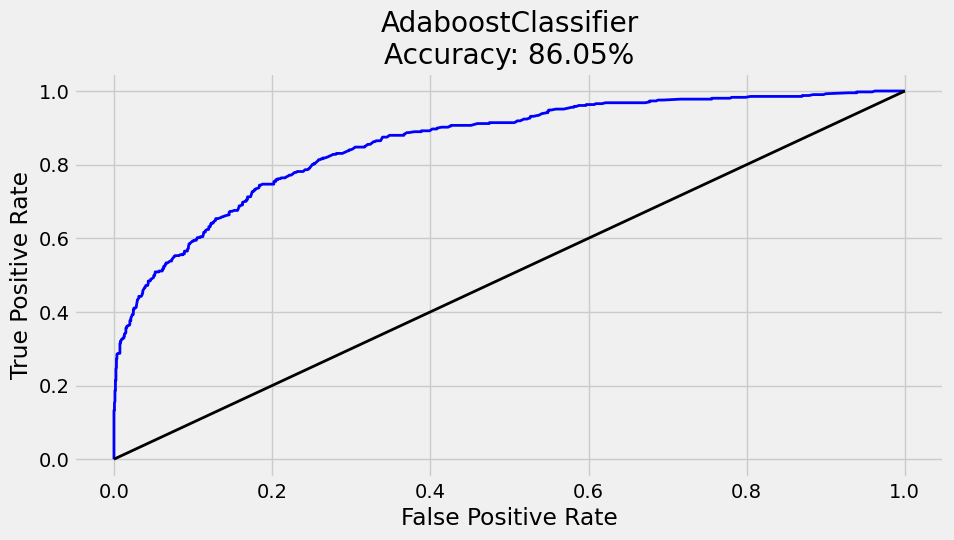

In [28]:
# visualization 
y_prob = abc1.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaboostClassifier\nAccuracy: {:.2f}%'.format(acc1 * 100))
plt.show()

# Model Prediction with New Data

In [29]:
ss= StandardScaler()

#Prediction Function
def prediction(CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary):
    features = np.array([[CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary]])
    features = ss.fit_transform(features)
    prediction = abc1.predict(features).reshape(1,-1)      #pre-trained model abc1 to predict whether the customer will churn.
    return prediction[0]

#Input Data for Prediction
CreditScore = 608
Geography = 2
Gender = 0
Age = 41
Tenure = 1
Balance = 95807.86
NumOfProducts = 1
HasCrCard = 0
IsActiveMember = 1
EstimatedSalary = 132545.78


#Making the Prediction
pred  = prediction(CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary)

#Displaying the Prediction Result
if pred == 1:
    print("He left the compnay")
else:
    print("He is there still")

He is there still


In [30]:
#Saving the Model
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(abc1,open('abc1.pkl','wb'))

#### Outcome:

- Accuracy: Our AdaBoostClassifier achieved an accuracy of 0.86%, indicating its effectiveness in predicting customer churn.
- Classification Report: The classification report detailed precision, recall, and F1-score for churn and non-churn classes, offering a comprehensive view of model performance.
- Confusion Matrix: Visualizing true positives, false positives, true negatives, and false negatives provided insights into model strengths and areas for improvement.

#### Future Steps:

- Continuous Improvement: Refine the model with additional data and feedback loops from business operations.
- Customer Segmentation: Further segment customers based on behavior and preferences to tailor retention strategies more effectively.
- Integration: Integrate the churn prediction model into business operations to guide proactive customer retention efforts.

By implementing this churn prediction model, our business can better anticipate and mitigate customer attrition, ultimately enhancing customer satisfaction and business profitability in the subscription-based service industry.